In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from upgini import FeaturesEnricher, SearchKey
from upgini.metadata import CVType

In [2]:
%matplotlib inline

In [3]:
thefts = pd.read_csv("../dataset/final/valid_train_thefts.csv")
non_thefts = pd.read_csv("../dataset/final/valid_train_non_theft_suc_theft_acct.csv")

original_df = pd.concat([thefts, non_thefts])
original_df.drop(columns=['acct', 'successor', 'voltage'], inplace=True)
original_df.fillna(-1, inplace=True)

In [4]:
original_df.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,median_measurement_interval_in_days,days_since_last_measurement,parno,xrhsh,contract_capacity,acct_control,number_of_requests,target
0,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,15,144.181818,122.0,152,0,1,12.0,0,0,1
1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,6,122.416667,121.0,341,0,1,12.0,0,1,1
2,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,120,122.250000,122.0,1251,2,1,25.0,0,3,1
3,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,68,197.200000,182.0,190,2,6,25.0,0,0,1
4,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,121,139.142857,121.0,821,3,1,35.0,0,5,1


In [6]:
original_df

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,median_measurement_interval_in_days,days_since_last_measurement,parno,xrhsh,contract_capacity,acct_control,number_of_requests,target
0,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,15,144.181818,122.0,152,0,1,12.0,0,0,1
1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,6,122.416667,121.0,341,0,1,12.0,0,1,1
2,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,120,122.250000,122.0,1251,2,1,25.0,0,3,1
3,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,68,197.200000,182.0,190,2,6,25.0,0,0,1
4,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,121,139.142857,121.0,821,3,1,35.0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,24,0,576.600000,41.480519,253.634949,209.692308,167.690370,77,6,34.434783,30.0,94,3,2,35.0,0,0,0
2090,5,4,0.043011,0.000000,0.010753,0.000000,0.018624,124,93,114.250000,120.0,1346,0,1,12.0,0,3,0
2091,1,0,0.000100,0.000100,0.000100,0.000100,0.000000,0,0,0.000000,0.0,169,0,1,12.0,0,1,0
2092,6,0,14.312500,8.252033,10.474311,9.650000,2.087191,123,32,103.400000,121.0,1292,0,1,12.0,0,8,0


In [25]:
tmp = original_df.copy()
rename_columns = {
    "number_of_measurements": "#Measurements",
    "number_of_zeros": "#Zeros",
    "max_energy_per_day": "Maximum Energy",
    "min_energy_per_day": "Minimum Energy",
    "mean_energy_per_day": "Average Energy",
    "median_energy_per_day": "Median Energy",
    "std_energy_per_day": "Standard Deviation Energy",
    "max_measurement_interval_in_days": "Max Interval",
    "min_measurement_interval_in_days": "Minimum Interval",
    "mean_measurement_interval_in_days": "Avg Interval",
    "median_measurement_interval_in_days": "Median Interval",
    "days_since_last_measurement": "Last Measurement",
    "xrhsh": "Usage Type",
    "contract_capacity": "Contract Capacity",
    "acct_control": "Account Control",
    "number_of_requests": "#Requests",
    "target": "Target"
}
tmp.rename(columns=rename_columns, inplace=True)
tmp.drop(columns=['parno'], inplace=True)

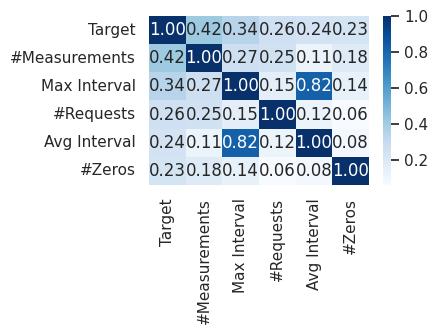

In [33]:
sns.set_theme(style="white")
corr = tmp.corr()
top_features = corr['Target'].abs().sort_values(ascending=False).head(6).index
reduced_corr = tmp[top_features].corr()
plt.figure(figsize=(4.5, 3.5))
sns.set_theme(style="white")
heatmap = sns.heatmap(reduced_corr, annot=True, cmap="Blues", fmt='.2f')
plt.tight_layout()
plt.savefig("Fig2_corr.pdf")

In [6]:
thefts_new = pd.read_csv("thefts_final.csv")
non_thefts_new = pd.read_csv("non_thefts_final.csv")

In [7]:
thefts_new.head()

,ID,XRHSH,CONTRACT_CAPACITY,MEASUREMENT_DATE,CSS_MS_HS_USE,INITIAL_DETECTION_DATE,TARGET
0,100040-1,1,12.0,"['2018-03-29', '2018-08-01', '2018-11-29', '20...","[1116, 397, 575, 0, 0, 2328, 880, 1148, 860, 8...",2019-11-14,1
1,100915-1,1,12.0,"['2018-01-16', '2018-05-16', '2018-09-14', '20...","[609, 1, 0, 0, 368, 1171, 1521, 2523, 1382, 13...",2022-02-02,1
2,101153-1,1,25.0,"['2018-03-27', '2018-07-30', '2018-11-27', '20...","[0, 0, 0, 0, 0]",2021-04-11,1
3,101214-1,6,25.0,"['2019-10-12', '2019-12-19', '2020-12-24', '20...","[0, 371, 1851, 1717, 832, 899]",2019-12-10,1
4,102718-1,1,35.0,"['2018-01-31', '2018-06-01', '2018-10-01', '20...","[1706, 1499, 2387, 1954, 983, 1221, 470, 720]",2020-09-23,1


In [8]:
non_thefts_new.head()

,ID,XRHSH,CONTRACT_CAPACITY,MEASUREMENT_DATE,CSS_MS_HS_USE,TARGET
0,0-1,2,12.0,"['2018-03-30', '2018-11-30', '2019-12-02', '20...","[12, 33, 77, 135]",0
1,0-2,2,12.0,"['2020-07-02', '2020-08-04', '2020-09-17', '20...","[0, 52, 67, 120, 34, 35, 41, 127, 43]",0
2,1-5,2,25.0,"['2018-03-28', '2018-08-01', '2018-11-28', '20...","[4332, 3875, 4556, 3895, 3871, 3841, 5049, 353...",0
3,10-2,1,25.0,"['2018-03-05', '2018-07-04', '2018-07-17']","[1704, 1147, 25]",0
4,10-3,1,25.0,"['2018-09-11', '2018-11-02', '2019-03-01', '20...","[0, 602, 1076, 747, 1477, 1648, 1685, 717, 115...",0


In [9]:
thefts_new[['acct', 'successor']] = thefts_new['ID'].str.split('-', expand=True)
thefts_new['acct'] = thefts_new['acct'].astype(int)
thefts_new['successor'] = thefts_new['successor'].astype(int)
thefts_new.drop(['ID', 'XRHSH', 'CONTRACT_CAPACITY', 'INITIAL_DETECTION_DATE'], axis=1, inplace=True)

non_thefts_new[['acct', 'successor']] = non_thefts_new['ID'].str.split('-', expand=True)
non_thefts_new['acct'] = non_thefts_new['acct'].astype(int)
non_thefts_new['successor'] = non_thefts_new['successor'].astype(int)
non_thefts_new.drop(['ID', 'XRHSH', 'CONTRACT_CAPACITY'], axis=1, inplace=True)

In [10]:
thefts_new['CSS_MS_HS_USE'] = thefts_new['CSS_MS_HS_USE'].apply(lambda x: eval(x))
thefts_new['MEASUREMENT_DATE'] = thefts_new['MEASUREMENT_DATE'].apply(lambda x: eval(x))

non_thefts_new['CSS_MS_HS_USE'] = non_thefts_new['CSS_MS_HS_USE'].apply(lambda x: eval(x))
non_thefts_new['MEASUREMENT_DATE'] = non_thefts_new['MEASUREMENT_DATE'].apply(lambda x: eval(x))

In [11]:
thefts_new.head()

,MEASUREMENT_DATE,CSS_MS_HS_USE,INITIAL_DETECTION_DATE,TARGET,acct,successor
0,"[2018-03-29, 2018-08-01, 2018-11-29, 2019-11-1...","[1116, 397, 575, 0, 0, 2328, 880, 1148, 860, 8...",2019-11-14,1,100040,1
1,"[2018-01-16, 2018-05-16, 2018-09-14, 2019-01-1...","[609, 1, 0, 0, 368, 1171, 1521, 2523, 1382, 13...",2022-02-02,1,100915,1
2,"[2018-03-27, 2018-07-30, 2018-11-27, 2019-03-2...","[0, 0, 0, 0, 0]",2021-04-11,1,101153,1
3,"[2019-10-12, 2019-12-19, 2020-12-24, 2021-06-2...","[0, 371, 1851, 1717, 832, 899]",2019-12-10,1,101214,1
4,"[2018-01-31, 2018-06-01, 2018-10-01, 2019-01-3...","[1706, 1499, 2387, 1954, 983, 1221, 470, 720]",2020-09-23,1,102718,1


In [12]:
non_thefts_new.head()

,MEASUREMENT_DATE,CSS_MS_HS_USE,TARGET,acct,successor
0,"[2018-03-30, 2018-11-30, 2019-12-02, 2020-07-02]","[12, 33, 77, 135]",0,0,1
1,"[2020-07-02, 2020-08-04, 2020-09-17, 2020-12-0...","[0, 52, 67, 120, 34, 35, 41, 127, 43]",0,0,2
2,"[2018-03-28, 2018-08-01, 2018-11-28, 2019-03-2...","[4332, 3875, 4556, 3895, 3871, 3841, 5049, 353...",0,1,5
3,"[2018-03-05, 2018-07-04, 2018-07-17]","[1704, 1147, 25]",0,10,2
4,"[2018-09-11, 2018-11-02, 2019-03-01, 2019-07-0...","[0, 602, 1076, 747, 1477, 1648, 1685, 717, 115...",0,10,3


In [13]:
acct_nbrs = thefts_new['acct'].values

non_thefts_new = non_thefts_new.loc[non_thefts_new['acct'].isin(acct_nbrs)]
non_thefts_new = non_thefts_new.reset_index(drop=True)
non_thefts_new.head()

,MEASUREMENT_DATE,CSS_MS_HS_USE,TARGET,acct,successor
0,"[2022-01-24, 2022-02-02, 2022-05-17, 2022-09-16]","[0, 103, 945, 1325]",0,100915,2
1,"[2020-10-01, 2021-02-10, 2021-06-02, 2021-10-0...","[0, 796, 628, 726, 904, 755]",0,102718,2
2,"[2022-04-06, 2022-04-12, 2022-08-11]","[0, 6, 516]",0,103875,2
3,"[2018-04-24, 2018-06-20, 2018-10-10]","[0, 995, 1429]",0,10539,2
4,"[2018-02-09, 2018-06-13, 2018-10-11, 2019-02-0...","[2360, 435, 429, 489, 389, 574, 980, 1730, 365...",0,10607,1


In [14]:
def extract_month(date_str):
    date_obj = pd.to_datetime(date_str)
    return date_obj.month

In [15]:
def get_measurements_interval(df):
    df = df.copy()
    # create new columns with default value of -1
    df['Month_2'] = 0
    df['Month_2_counts'] = 0
    df['Month_5'] = 0
    df['Month_5_counts'] = 0
    df['Month_8'] = 0
    df['Month_8_counts'] = 0
    df['Month_11'] = 0
    df['Month_11_counts'] = 0
    
    for i, row in df.iterrows():
        if i % 1000 == 0:
            print(i, len(df))
        measurement_dates = row['MEASUREMENT_DATE']
        css_ms_use = row['CSS_MS_HS_USE']

        for date_str, value in zip(measurement_dates, css_ms_use):
            month = extract_month(date_str)

            if month in [12, 1, 2]:
                if df.at[i, 'Month_2'] == 0:
                    df.at[i, 'Month_2'] = value
                else:
                    df.at[i, 'Month_2'] += value
                df.at[i, 'Month_2_counts'] +=1 
            elif month in [3, 4, 5]:
                if df.at[i, 'Month_5'] == 0:
                    df.at[i, 'Month_5'] = value
                else:
                    df.at[i, 'Month_5'] += value
                df.at[i, 'Month_5_counts'] +=1
            elif month in [6, 7, 8]:
                if df.at[i, 'Month_8'] == 0:
                    df.at[i, 'Month_8'] = value
                else:
                    df.at[i, 'Month_8'] += value
                df.at[i, 'Month_8_counts'] +=1
            elif month in [9, 10, 11]:
                if df.at[i, 'Month_11'] == 0:
                    df.at[i, 'Month_11'] = value
                else:
                    df.at[i, 'Month_11'] += value
                df.at[i, 'Month_11_counts'] +=1
    return df

In [33]:
thefts_new = get_measurements_interval(thefts_new)
non_thefts_new = get_measurements_interval(non_thefts_new)

0 1555
1000 1555
0 2094
1000 2094
2000 2094


In [37]:
thefts_new['FIRST_DATE'] = thefts_new['MEASUREMENT_DATE'].apply(lambda x: x[0])
non_thefts_new['FIRST_DATE'] = non_thefts_new['MEASUREMENT_DATE'].apply(lambda x: x[0])

In [41]:
thefts_new['FIRST_DATE'] = pd.to_datetime(thefts_new['FIRST_DATE'])
non_thefts_new['FIRST_DATE'] = pd.to_datetime(non_thefts_new['FIRST_DATE'])

In [42]:
thefts_df_new = pd.merge(thefts, thefts_new[[
    'Month_2','Month_5','Month_8','Month_11',
    'Month_2_counts','Month_5_counts','Month_8_counts','Month_11_counts',
    'acct','successor', 'FIRST_DATE']], on=['acct', 'successor'])
non_thefts_df_new = pd.merge(non_thefts, non_thefts_new[[
    'Month_2','Month_5','Month_8','Month_11',
    'Month_2_counts','Month_5_counts','Month_8_counts','Month_11_counts',
    'acct','successor', 'FIRST_DATE']], on=['acct', 'successor'])

In [43]:
thefts_df_new.head()

,acct,successor,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,...,target,Month_2,Month_5,Month_8,Month_11,Month_2_counts,Month_5_counts,Month_8_counts,Month_11_counts,FIRST_DATE
0,100040,1,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,...,1,1740,4538,4432,575,2,3,4,3,2018-03-29
1,100915,1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,...,1,4901,1701,0,4503,6,3,0,4,2018-01-16
2,101153,1,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,...,1,0,0,0,0,0,2,2,1,2018-03-27
3,101214,1,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,...,1,3054,0,2616,0,3,0,2,1,2019-10-12
4,102718,1,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,...,1,3660,983,1969,4328,2,1,2,3,2018-01-31


In [44]:
non_thefts_df_new.head()

,acct,successor,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,...,target,Month_2,Month_5,Month_8,Month_11,Month_2_counts,Month_5_counts,Month_8_counts,Month_11_counts,FIRST_DATE
0,100915,2,4,0,11.444444,9.086538,10.463880,10.860656,1.002664,122,...,0,103,945,0,1325,2,1,0,1,2022-01-24
1,102718,2,6,0,7.290323,5.607143,6.254461,6.030303,0.568356,132,...,0,1700,0,1383,726,2,0,2,2,2020-10-01
2,103875,2,3,0,4.264463,1.000000,2.632231,2.632231,1.632231,121,...,0,0,6,516,0,0,2,1,0,2022-04-06
3,10539,2,3,0,17.456140,12.758929,15.107534,15.107534,2.348606,112,...,0,0,0,995,1429,0,1,1,1,2018-04-24
4,10607,1,10,0,20.971014,2.967480,6.842664,3.920000,6.070888,250,...,0,3214,1447,1804,2733,3,1,3,3,2018-02-09


In [45]:
thefts_df_new.number_of_measurements.min(), thefts_df_new.number_of_measurements.max()

(1, 57)

In [46]:
non_thefts_df_new.number_of_measurements.min(), thefts_df_new.number_of_measurements.max()

(1, 57)

In [47]:
new_df = pd.concat([thefts_df_new, non_thefts_df_new])
new_df.drop(columns=['acct', 'successor', 'voltage'], inplace=True)
new_df.fillna(-1, inplace=True)
#plt.figure(figsize=(14,8))
#sns.set_theme(style="white")
#corr = new_df.corr()
#heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [50]:
new_df.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,...,target,Month_2,Month_5,Month_8,Month_11,Month_2_counts,Month_5_counts,Month_8_counts,Month_11_counts,FIRST_DATE
0,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,15,144.181818,...,1,1740,4538,4432,575,2,3,4,3,2018-03-29
1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,6,122.416667,...,1,4901,1701,0,4503,6,3,0,4,2018-01-16
2,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,120,122.250000,...,1,0,0,0,0,0,2,2,1,2018-03-27
3,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,68,197.200000,...,1,3054,0,2616,0,3,0,2,1,2019-10-12
4,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,121,139.142857,...,1,3660,983,1969,4328,2,1,2,3,2018-01-31


In [88]:
X = new_df.drop('target', axis=1)
y = new_df['target']

In [90]:
X.dtypes

number_of_measurements                          int64
number_of_zeros                                 int64
max_energy_per_day                            float64
min_energy_per_day                            float64
mean_energy_per_day                           float64
median_energy_per_day                         float64
std_energy_per_day                            float64
max_measurement_interval_in_days                int64
min_measurement_interval_in_days                int64
mean_measurement_interval_in_days             float64
median_measurement_interval_in_days           float64
days_since_last_measurement                     int64
parno                                           int64
xrhsh                                           int64
contract_capacity                             float64
acct_control                                    int64
number_of_requests                              int64
Month_2                                         int64
Month_5                     

In [89]:
X.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,...,number_of_requests,Month_2,Month_5,Month_8,Month_11,Month_2_counts,Month_5_counts,Month_8_counts,Month_11_counts,FIRST_DATE
0,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,15,144.181818,...,0,1740,4538,4432,575,2,3,4,3,2018-03-29
1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,6,122.416667,...,1,4901,1701,0,4503,6,3,0,4,2018-01-16
2,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,120,122.250000,...,3,0,0,0,0,0,2,2,1,2018-03-27
3,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,68,197.200000,...,0,3054,0,2616,0,3,0,2,1,2019-10-12
4,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,121,139.142857,...,5,3660,983,1969,4328,2,1,2,3,2018-01-31


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [93]:
enricher = FeaturesEnricher(
    search_keys = {
      "FIRST_DATE": SearchKey.DATE,
    },
    country_code = 'GR'
)

In [94]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [95]:
X_train[X_train.duplicated()]

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,...,number_of_requests,Month_2,Month_5,Month_8,Month_11,Month_2_counts,Month_5_counts,Month_8_counts,Month_11_counts,FIRST_DATE
1442,1,0,0.0001,0.0001,0.0001,0.0001,0.0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,2022-08-25
1448,1,1,0.0000,0.0000,0.0000,0.0000,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,2022-09-14
1786,1,1,0.0000,0.0000,0.0000,0.0000,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,2022-09-22
1985,1,1,0.0000,0.0000,0.0000,0.0000,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,2022-09-13
2345,1,0,0.0001,0.0001,0.0001,0.0001,0.0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,2022-07-01
2556,1,0,0.0001,0.0001,0.0001,0.0001,0.0,0,0,0.0,...,0,0,0,0,0,0,0,1,0,2022-06-22
2837,1,1,0.0000,0.0000,0.0000,0.0000,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,2022-09-22
2907,1,1,0.0000,0.0000,0.0000,0.0000,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,2022-09-26


In [96]:
enricher.fit(
    X_train,
    y_train,
    eval_set=[(X_test,y_test)],
    calculate_metrics=True
)

Detected task type: ModelTaskType.BINARY


Column name,Status,Description
country_iso_code,All valid,All values in this column are good to go
target,All valid,All values in this column are good to go
first_date,All valid,All values in this column are good to go


Running search request with search_id=908ef14d-0d48-42ef-b32e-1c8b4ffc6384
We'll send email notification once it's completed, just use your personal api_key from profile.upgini.com
Done


19 relevant feature(s) found with the search keys: ['FIRST_DATE', 'country_iso_code']


/home/vasilis/miniconda3/envs/HendoChallenge/lib/python3.10/site-packages/upgini/features_enricher.py:1476: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(self.features_info.head(60).style.hide_index())


provider,source,feature name,shap value,coverage %,type,feature type
,,number_of_measurements,0.129027,100.000000,numerical,
,,number_of_requests,0.098419,100.000000,numerical,
,,max_measurement_interval_in_days,0.053161,100.000000,numerical,
,,min_energy_per_day,0.049247,100.000000,numerical,
Upgini,Public data,f_financial_date_snp500_3e044492,0.048757,100.000000,numerical,Free
,,days_since_last_measurement,0.039576,100.000000,numerical,
,,Month_5_counts,0.027827,100.000000,numerical,
Upgini,Public data,f_economic_date_cci_pca_7_17261951,0.018347,97.226037,numerical,Free
,,number_of_zeros,0.018116,100.000000,numerical,
Upgini,Public data,f_financial_date_natural_gas_7d_to_1y_a1675470,0.017133,100.000000,numerical,Free


Calculating metrics...
Done

Quality metrics


,match_rate,baseline roc_auc,enriched roc_auc,uplift
,,,,
train,100.0,0.786138,0.280867,-0.505271
eval 1,100.0,0.842336,0.784928,-0.057408


In [98]:
X.reset_index(inplace=True, drop=True)

In [106]:
df2=enricher.transform(X, max_features=50)

Column name,Status,Description
country_iso_code,All valid,All values in this column are good to go
first_date,All valid,All values in this column are good to go


Running search request with search_id=a8898766-531c-408d-8f77-748b0eb0612e
We'll send email notification once it's completed, just use your personal api_key from profile.upgini.com
Done

Done


In [107]:
df2.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,...,f_economic_country_date_pcpio_ix_1d3aefe0,f_economic_country_date_pcpir_pc_cp_a_pt_8383cb9b,f_economic_date_cbpol_umap_2_efd840cf,f_economic_country_date_pcpihaf_pc_pp_pt_63a80c83,f_weather_date_weather_umap_40_8720f57f,f_economic_country_date_cci_6m_shift_9da982e5,f_events_date_year_sin1_3c44bc64,f_economic_date_cpi_umap_7_d43e2396,f_economic_country_date_pcpiec_ix_5e3ceee9,f_events_date_month_sin1_51d9011f
0,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,15,144.181818,...,102.1325,-1.385744,1.735423,0.139762,4.651757,97.15673,0.995105,11.074903,95.44134,-0.571268
1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,6,122.416667,...,102.1805,-1.643189,6.172296,-0.040088,4.667871,96.31882,0.417194,9.496735,95.45232,0.101168
2,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,120,122.250000,...,102.1325,-1.385744,1.724232,0.139762,4.766849,97.15673,0.997917,11.124155,95.44134,-0.848644
3,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,68,197.200000,...,101.2645,-1.694597,1.808948,0.670527,4.535178,99.76731,-0.939856,7.793014,102.33980,0.790776
4,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,121,139.142857,...,102.1805,-1.643189,-0.078389,-0.040088,4.597350,96.31882,0.635432,9.473846,95.45232,-0.201299


In [108]:
new_df.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,...,target,Month_2,Month_5,Month_8,Month_11,Month_2_counts,Month_5_counts,Month_8_counts,Month_11_counts,FIRST_DATE
0,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,15,144.181818,...,1,1740,4538,4432,575,2,3,4,3,2018-03-29
1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,6,122.416667,...,1,4901,1701,0,4503,6,3,0,4,2018-01-16
2,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,120,122.250000,...,1,0,0,0,0,0,2,2,1,2018-03-27
3,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,68,197.200000,...,1,3054,0,2616,0,3,0,2,1,2019-10-12
4,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,121,139.142857,...,1,3660,983,1969,4328,2,1,2,3,2018-01-31


In [109]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [110]:
len(df2), len(y)

(3649, 3649)

In [111]:
merged_df = pd.merge(df2, y, left_index=True, right_index=True)

In [113]:
merged_df.reset_index(inplace=True, drop=True)

In [114]:
merged_df.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,...,f_economic_country_date_pcpir_pc_cp_a_pt_8383cb9b,f_economic_date_cbpol_umap_2_efd840cf,f_economic_country_date_pcpihaf_pc_pp_pt_63a80c83,f_weather_date_weather_umap_40_8720f57f,f_economic_country_date_cci_6m_shift_9da982e5,f_events_date_year_sin1_3c44bc64,f_economic_date_cpi_umap_7_d43e2396,f_economic_country_date_pcpiec_ix_5e3ceee9,f_events_date_month_sin1_51d9011f,target
0,12,2,18.950000,0.0,6.735356,7.049180,4.964937,350,15,144.181818,...,-1.385744,1.735423,0.139762,4.651757,97.15673,0.995105,11.074903,95.44134,-0.571268,1
1,12,2,18.950000,0.0,6.735356,7.049180,4.964937,350,15,144.181818,...,-1.385744,1.735423,0.139762,4.651757,97.15673,0.995105,11.074903,95.44134,-0.571268,0
2,13,2,12.071429,0.0,7.221644,10.070525,4.807979,243,6,122.416667,...,-1.643189,6.172296,-0.040088,4.667871,96.31882,0.417194,9.496735,95.45232,0.101168,1
3,13,2,12.071429,0.0,7.221644,10.070525,4.807979,243,6,122.416667,...,-1.643189,6.172296,-0.040088,4.667871,96.31882,0.417194,9.496735,95.45232,0.101168,0
4,5,5,0.000000,0.0,0.000000,0.000000,0.000000,125,120,122.250000,...,-1.385744,1.724232,0.139762,4.766849,97.15673,0.997917,11.124155,95.44134,-0.848644,1


In [143]:
df = merged_df.copy()
#df.drop(['xrhsh', 'parno', 'acct_control', 'contract_capacity', 'min_measurement_interval_in_days', 'max_energy_per_day'], axis=1, inplace=True)
print("Bincount of y:", df['target'].value_counts())
#plt.figure(figsize=(20,8))
#sns.set_theme(style="white")
#corr = df.corr()
#heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

Bincount of y: 0    2094
1    1555
Name: target, dtype: int64


In [144]:
df.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,...,f_economic_country_date_pcpir_pc_cp_a_pt_8383cb9b,f_economic_date_cbpol_umap_2_efd840cf,f_economic_country_date_pcpihaf_pc_pp_pt_63a80c83,f_weather_date_weather_umap_40_8720f57f,f_economic_country_date_cci_6m_shift_9da982e5,f_events_date_year_sin1_3c44bc64,f_economic_date_cpi_umap_7_d43e2396,f_economic_country_date_pcpiec_ix_5e3ceee9,f_events_date_month_sin1_51d9011f,target
0,12,2,18.950000,0.0,6.735356,7.049180,4.964937,350,15,144.181818,...,-1.385744,1.735423,0.139762,4.651757,97.15673,0.995105,11.074903,95.44134,-0.571268,1
1,12,2,18.950000,0.0,6.735356,7.049180,4.964937,350,15,144.181818,...,-1.385744,1.735423,0.139762,4.651757,97.15673,0.995105,11.074903,95.44134,-0.571268,0
2,13,2,12.071429,0.0,7.221644,10.070525,4.807979,243,6,122.416667,...,-1.643189,6.172296,-0.040088,4.667871,96.31882,0.417194,9.496735,95.45232,0.101168,1
3,13,2,12.071429,0.0,7.221644,10.070525,4.807979,243,6,122.416667,...,-1.643189,6.172296,-0.040088,4.667871,96.31882,0.417194,9.496735,95.45232,0.101168,0
4,5,5,0.000000,0.0,0.000000,0.000000,0.000000,125,120,122.250000,...,-1.385744,1.724232,0.139762,4.766849,97.15673,0.997917,11.124155,95.44134,-0.848644,1


In [145]:
df.drop(['FIRST_DATE'],axis=1, inplace=True)
df.fillna(-1, inplace=True)

In [146]:
# define X and y
X = df.drop('target', axis=1)
y = df['target']

In [147]:
import sys
import os

from pathlib import Path

parent = Path(os.path.abspath("")).resolve().parents[0]
if parent not in sys.path:
    sys.path.insert(0, str(parent))


from types import SimpleNamespace

import torch

from torch.utils.data import DataLoader

from models.mlp import MLP
from utils.data_utils import TorchDataset

from utils.metrics import get_classification_metrics, get_probability_measures, get_lift_demotion_scores

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [148]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [149]:
scaler = MinMaxScaler()

In [150]:
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
cat_clf = CatBoostClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
clfs = {'RandomForest': rf_clf, 'SVM': svm_clf, 'kNN': knn_clf,
        'LogisticRegression': lr_clf,'DecisionTree': dt_clf,
        'XGB': xgb_clf,
       'CatBoost': cat_clf, 'MLP': None}

In [151]:
for clf_name, clf in clfs.items():
    # Initialize the evaluation metrics lists
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
    brier_scores, auc_roc_scores, pr_auc_scores = [], [], []
    lift_scores, demotion_scores, weighted_scores = [], [], []
    

    print("Classifier:", clf_name)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        

        if clf_name == "CatBoost":
            clf.fit(X_train, y_train, verbose=False)
            
        elif clf_name == "MLP":
            train_dataset = TorchDataset(X=torch.tensor(X_train).float(), y=torch.tensor(y_train.to_numpy()).float())  # reconstruction
            test_dataset = TorchDataset(X=torch.tensor(X_test).float(), y=torch.tensor(y_test.to_numpy()).float())

            train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
            clf = MLP(in_size=X_train.shape[1], layer_units=[16, 32, 64], out_size=1, vae=False)
            optimizer = torch.optim.Adam(clf.parameters(), lr=1e-3)
            criterion = torch.nn.BCEWithLogitsLoss()
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
            args = dict(model=clf, train_loader=train_loader, test_loader=test_loader,
            epochs=100, optimizer=optimizer, criterion=criterion,
            reconstruction=False, vae=False, device=device, verbose=False, return_best=True)
            args = SimpleNamespace(**args)
            clf = clf.fit(args)
            
        else:
            clf.fit(X_train, y_train)

        if clf_name != "MLP":
            y_pred = clf.predict(X_test)

            acc, precision, recall, f1 = get_classification_metrics(y_test.values, y_pred)
            
            y_scores = clf.predict_proba(X_test)
            idx = np.argmax(y_scores, axis=1)
            y_scores = np.where(idx == 0, 1 - y_scores[:, 0], y_scores[:, 1])


            brier, roc_auc, pr_auc = get_probability_measures(y_test.values, y_scores)

            num_ones = np.sum(y_test == 1)
            lift, demotion, weighted_score = get_lift_demotion_scores(y_test.values, y_scores,
                                                                      num_samples=int(0.1 * num_ones))
        else:
            args = dict(
                model=clf,
                data_loader=test_loader, criterion=criterion,
            reconstruction=False, vae=False, device=device)
            args = SimpleNamespace(**args)
            _, acc, precision, recall, f1, brier, roc_auc, pr_auc, lift, demotion, weighted_score = clf.predict(
                args
            )
        
        acc_scores.append(acc)
        prec_scores.append(precision)
        rec_scores.append(recall)
        f1_scores.append(f1)
        
        brier_scores.append(brier)
        auc_roc_scores.append(roc_auc)
        pr_auc_scores.append(pr_auc)
        
        lift_scores.append(lift)
        demotion_scores.append(demotion)
        weighted_scores.append(weighted_score)
        
        print("Fold {} - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}"
              .format(len(acc_scores), acc_scores[-1], prec_scores[-1], rec_scores[-1], f1_scores[-1],
                     brier_scores[-1], auc_roc_scores[-1], pr_auc_scores[-1],
                     lift_scores[-1], demotion_scores[-1], weighted_scores[-1]))

    print("Average - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}\n"
          .format(sum(acc_scores)/len(acc_scores), sum(prec_scores)/len(prec_scores),
                  sum(rec_scores)/len(rec_scores), sum(f1_scores)/len(f1_scores),
                 sum(brier_scores)/len(brier_scores), sum(auc_roc_scores)/len(auc_roc_scores), sum(pr_auc_scores)/len(pr_auc_scores),
                 sum(lift_scores)/len(lift_scores), sum(demotion_scores)/len(demotion_scores), sum(weighted_scores)/len(weighted_scores)))


Classifier: RandomForest
Fold 1 - Accuracy: 0.2260, Precision: 0.0709, Recall: 0.0675, F1: 0.0692, Brier: 0.5122, AUC-ROC: 0.1107, PR-AUC: 0.2675, Lift: 0.0000, Demotion: 0.4839, Weighted: 0.1452
Fold 2 - Accuracy: 0.2233, Precision: 0.0556, Recall: 0.0514, F1: 0.0534, Brier: 0.5042, AUC-ROC: 0.1078, PR-AUC: 0.2665, Lift: 0.0000, Demotion: 0.4194, Weighted: 0.1258
Fold 3 - Accuracy: 0.2466, Precision: 0.0558, Recall: 0.0482, F1: 0.0517, Brier: 0.5043, AUC-ROC: 0.1200, PR-AUC: 0.2688, Lift: 0.0000, Demotion: 0.4194, Weighted: 0.1258
Fold 4 - Accuracy: 0.2274, Precision: 0.0653, Recall: 0.0611, F1: 0.0631, Brier: 0.5168, AUC-ROC: 0.1110, PR-AUC: 0.2678, Lift: 0.0000, Demotion: 0.4839, Weighted: 0.1452
Fold 5 - Accuracy: 0.2222, Precision: 0.0586, Recall: 0.0547, F1: 0.0566, Brier: 0.5228, AUC-ROC: 0.0979, PR-AUC: 0.2658, Lift: 0.0000, Demotion: 0.4194, Weighted: 0.1258
Average - Accuracy: 0.2291, Precision: 0.0612, Recall: 0.0566, F1: 0.0588, Brier: 0.5120, AUC-ROC: 0.1095, PR-AUC: 0.267

/home/vasilis/miniconda3/envs/HendoChallenge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vasilis/miniconda3/envs/HendoChallenge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Fold 3 - Accuracy: 0.5685, Precision: 0.4783, Recall: 0.1415, F1: 0.2184, Brier: 0.2409, AUC-ROC: 0.5673, PR-AUC: 0.4601, Lift: 0.4194, Demotion: 0.8710, Weighted: 0.5548
Fold 4 - Accuracy: 0.5521, Precision: 0.4385, Recall: 0.1833, F1: 0.2585, Brier: 0.2429, AUC-ROC: 0.5462, PR-AUC: 0.4482, Lift: 0.4194, Demotion: 0.8065, Weighted: 0.5355
Fold 5 - Accuracy: 0.5473, Precision: 0.4112, Recall: 0.1415, F1: 0.2105, Brier: 0.2404, AUC-ROC: 0.5639, PR-AUC: 0.4565, Lift: 0.4194, Demotion: 0.8387, Weighted: 0.5452
Average - Accuracy: 0.5508, Precision: 0.4228, Recall: 0.1453, F1: 0.2157, Brier: 0.2417, AUC-ROC: 0.5547, PR-AUC: 0.4500, Lift: 0.4065, Demotion: 0.8387, Weighted: 0.5361

Classifier: DecisionTree
Fold 1 - Accuracy: 0.2233, Precision: 0.0461, Recall: 0.0418, F1: 0.0438, Brier: 0.7616, AUC-ROC: 0.1446, PR-AUC: 0.3749, Lift: 0.0000, Demotion: 0.0968, Weighted: 0.0290
Fold 2 - Accuracy: 0.2233, Precision: 0.0328, Recall: 0.0289, F1: 0.0308, Brier: 0.7541, AUC-ROC: 0.1362, PR-AUC: 0.37